In [30]:
# from superpoint.datasets.utils import photometric_augmentation as daug
from superpoint.datasets.utils import augmentation_legacy as daug
from superpoint.datasets import synthetic_dataset as dset
from utils import plot_imgs
import cv2 as cv
import time
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


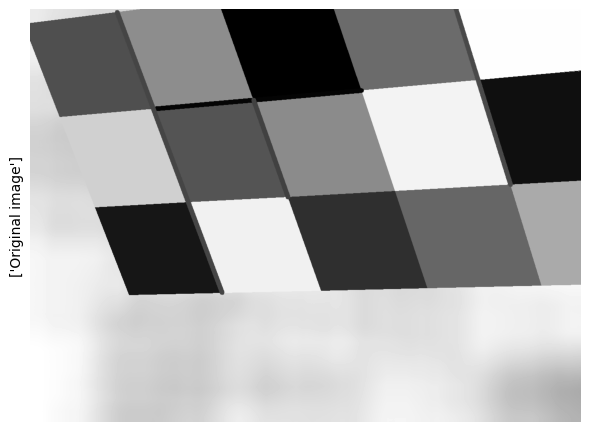

In [31]:
size = (960, 1280)
n_show = 2
# fcts = [daug.additive_gaussian_noise, daug.additive_speckle_noise, daug.change_brightness, daug.change_contrast,
#         daug.affine_transform, daug.perspective_transform, daug.elastic_transform, daug.random_crop, daug.add_shade,
#         daug.motion_blur]
fcts = [daug.additive_gaussian_noise]
img = dset.generate_background(size)
pts = dset.draw_checkerboard(img)
plot_imgs([img], ylabel=["Original image"],  normalize=True, cmap='gray')




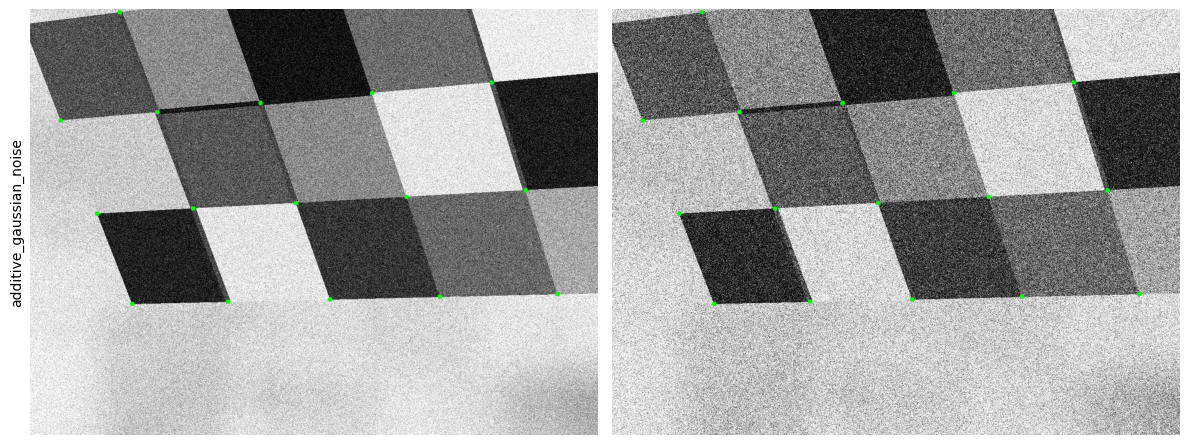

In [32]:

for f in fcts:
    r = []
    for _ in range(n_show):
        (img_distorted, new_pts) = f(img, pts)
        new_pts = new_pts.astype(int)
        img_distorted = dset.draw_interest_points(img_distorted, new_pts)
        r.append(img_distorted.copy())
    plot_imgs(r, ylabel=f.__name__,  normalize=True, cmap='gray')